In [1]:
import pandas as pd

In [2]:
# Load the dataset

data = pd.read_csv("E:\data_sets\KNN.csv")

In [3]:
# Prepare the features and target
X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = data['diagnosis']

In [4]:
# Convert target ('diagnosis') to binary (M:1, B:0)
y = y.map({'M': 1, 'B': 0})

In [6]:
# Split data into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Initialize KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)


In [8]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Make predictions
y_pred = knn.predict(X_test)

In [10]:
# Evaluate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


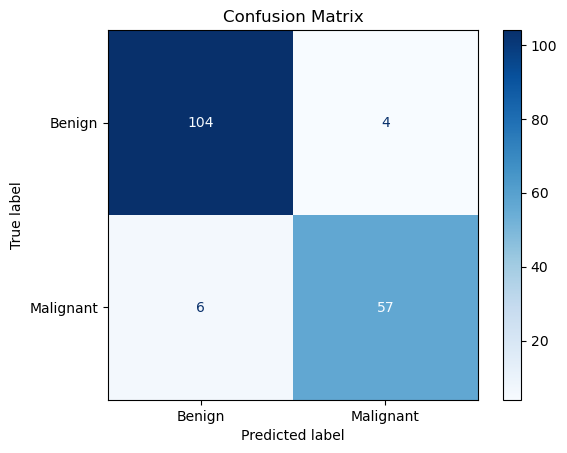

In [12]:
#Confusion Matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Benign', 'Malignant']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [13]:
#ROC Curve
y_pred_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Malignant)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

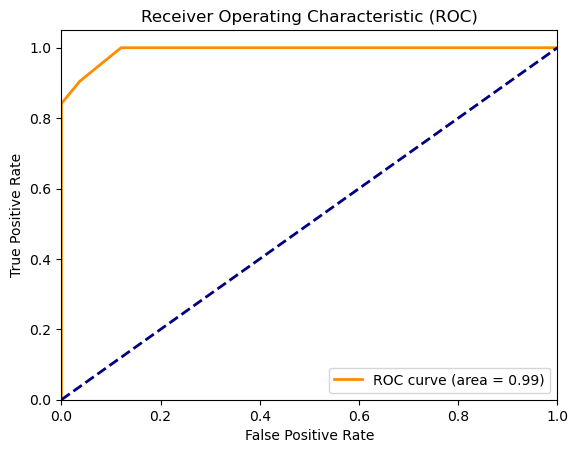

In [14]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()